Total amount of images: 354
Dataset contains 708 image pairs
Train contains 566 image pairs
Validation contains 70 image pairs
Test contains 72 image pairs


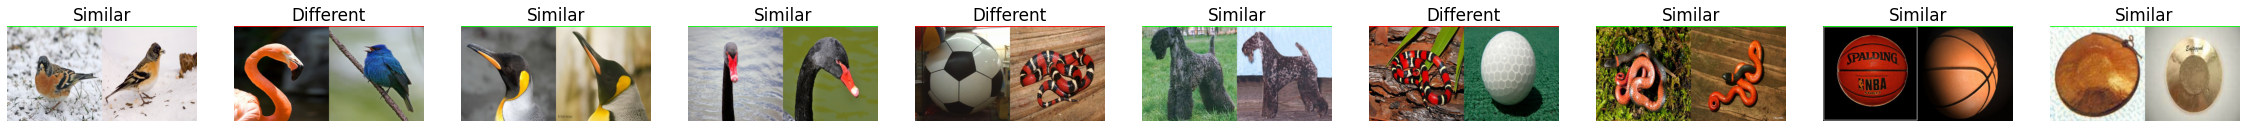

In [1]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

folders = util.load_images('../../data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print('Dataset contains', data.shape[0], 'image pairs')
print('Train contains', data_train.shape[0], 'image pairs')
print('Validation contains', data_val.shape[0], 'image pairs')
print('Test contains', data_test.shape[0], 'image pairs')

util.visualize(data_train, labels_train)

In [2]:
from keras.models import load_model

embedding_extractor = load_model('./binary_cross_entropy_loss_embedding_extractor.h5')

siamese = load_model('./binary_cross_entropy_loss_siamese.h5')

embedding_extractor.summary()

Model: "embedding_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 7, 7, 1280)        0         
                                                                 
 dense (Dense)               (None, 7, 7, 1280)        1639680   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 3,897,664
Trainable params: 1,639,680
Non-trainable params: 2,257,984
_________________________________________________________________


In [3]:
similarity = util.get_similarity_from_embedding(embedding_extractor, data_test)

similarity2 = []

for i in range(len(similarity)):
    similarity2.append(siamese([np.expand_dims(data_test[i][0], axis=0), np.expand_dims(data_test[i][1], axis=0)]).numpy()[0])

Took 6.76 seconds to predict 72 image pairs
Prediction time: 0.09 seconds


binary cross-entropy
- Amount of TP: 36
- Amount of TN: 36
- Amount of FP: 0
- Amount of FN: 0
- AUC score: 1.0
- Accuracy: 1.0
- Recall: 1.0
- Precision: 1.0
- F1: 1.0
- Kappa: 1.0


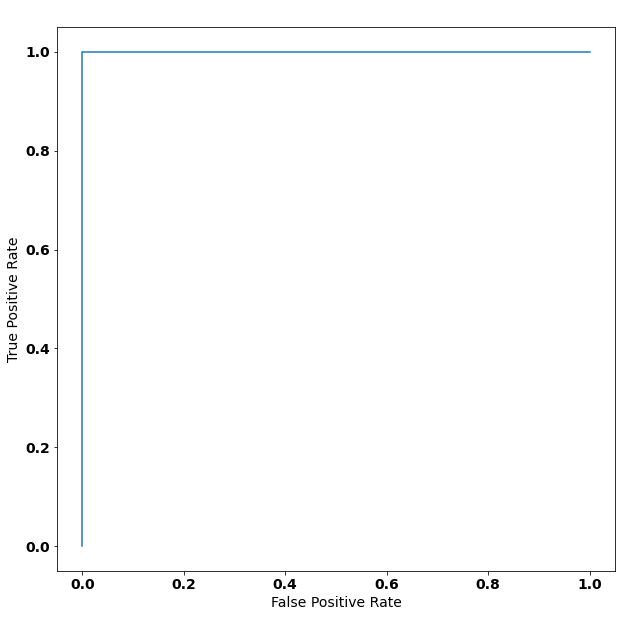

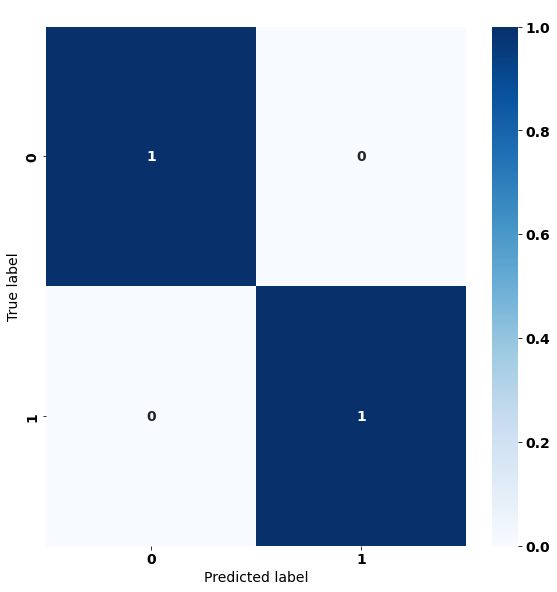

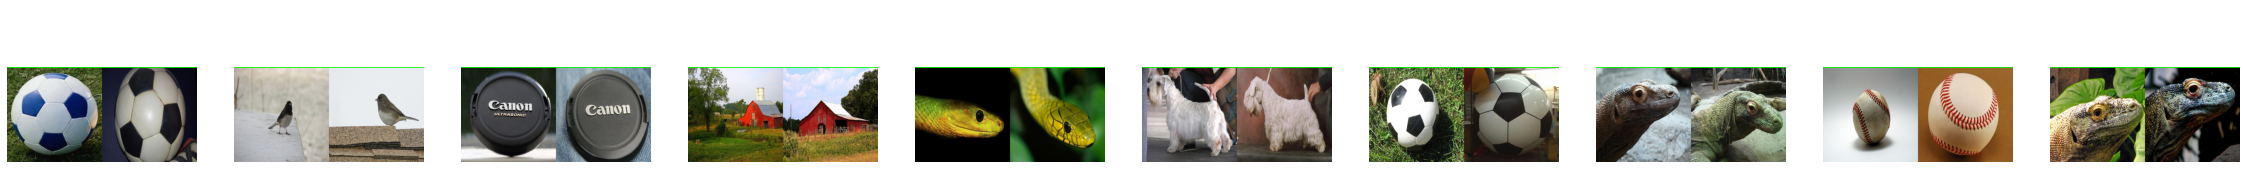

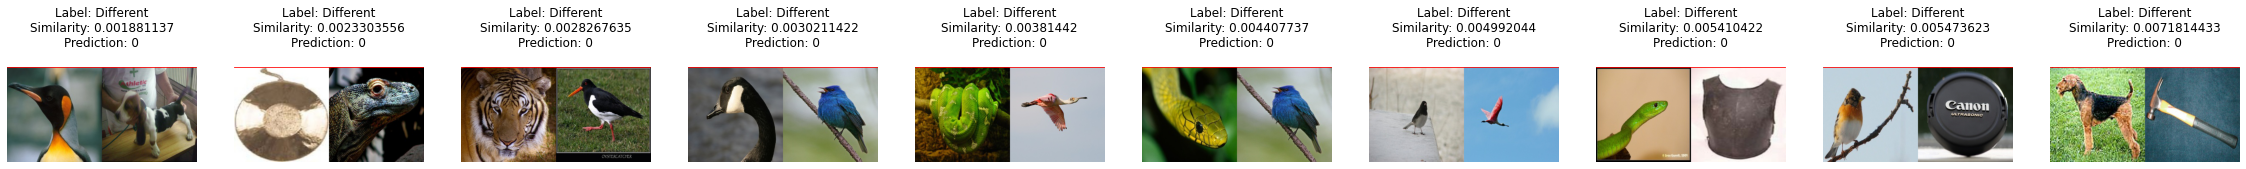

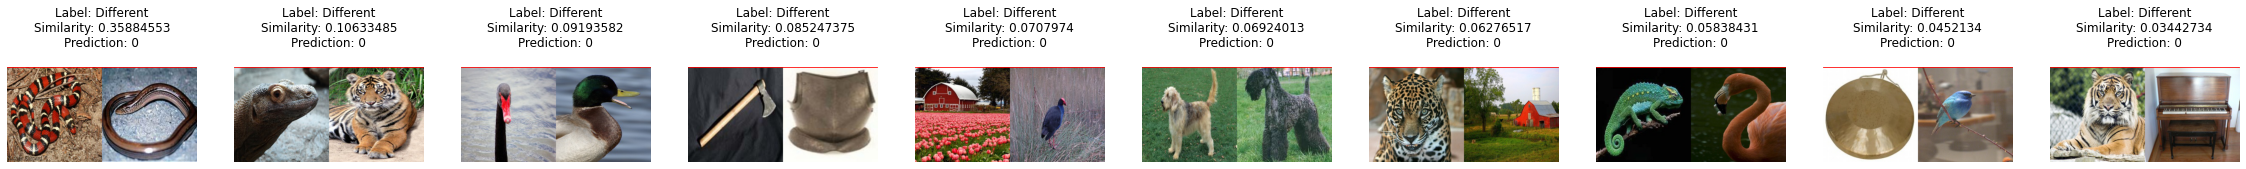

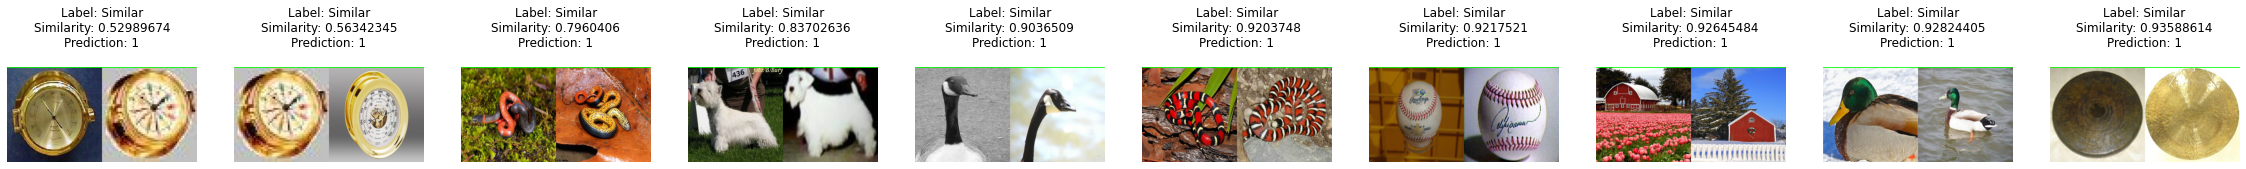

Threshold:  0.5


In [4]:
util.evaluate(data=data_test, labels=labels_test, similarity=similarity, name="binary cross-entropy", threshold=0.5)

binary cross-entropy
- Amount of TP: 36
- Amount of TN: 36
- Amount of FP: 0
- Amount of FN: 0
- AUC score: 1.0
- Accuracy: 1.0
- Recall: 1.0
- Precision: 1.0
- F1: 1.0
- Kappa: 1.0


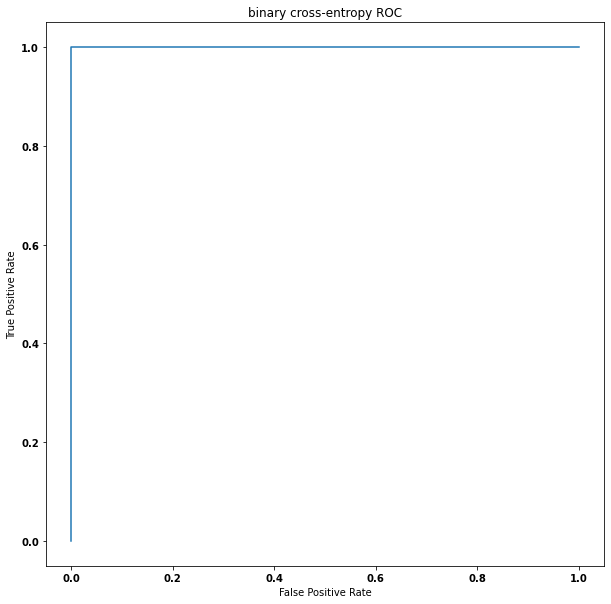

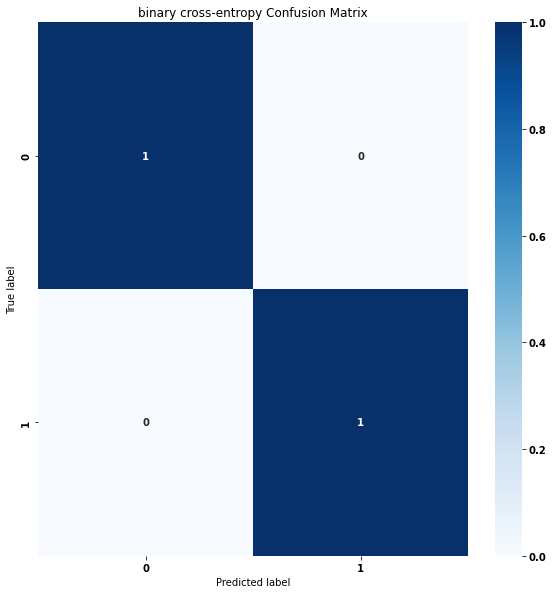

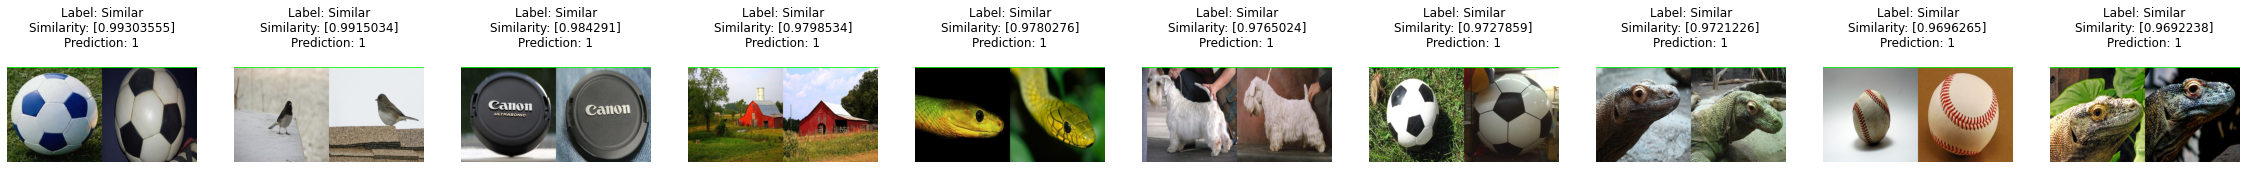

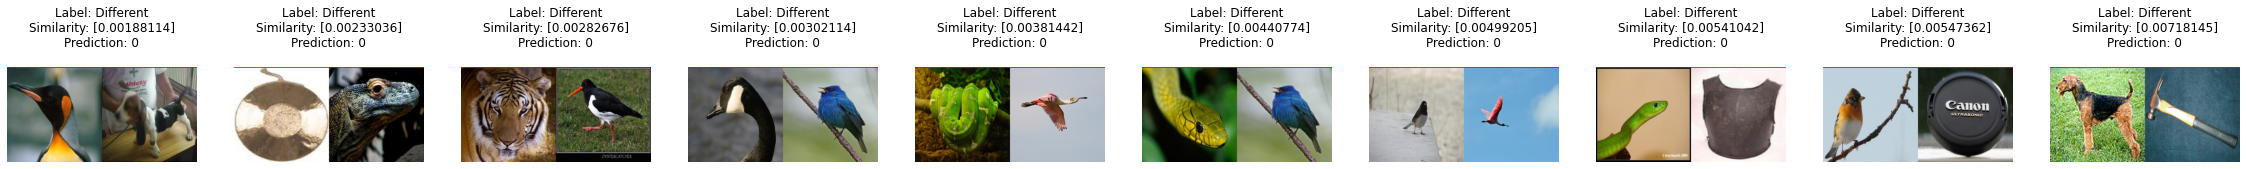

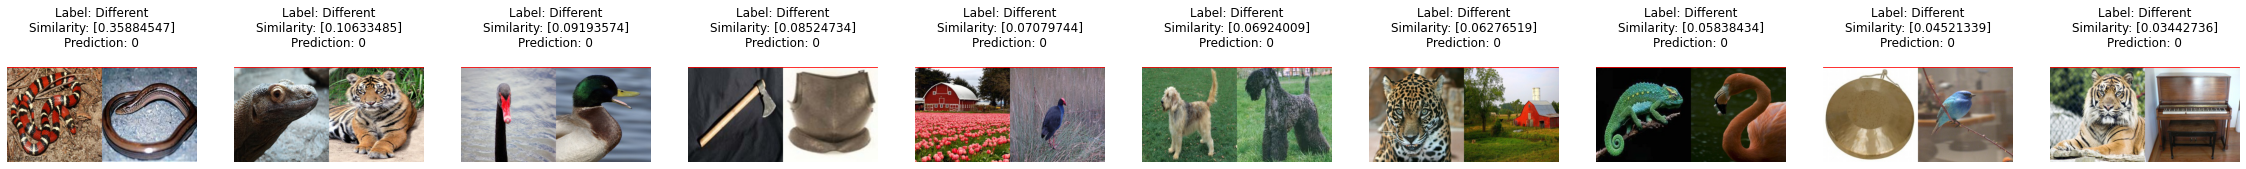

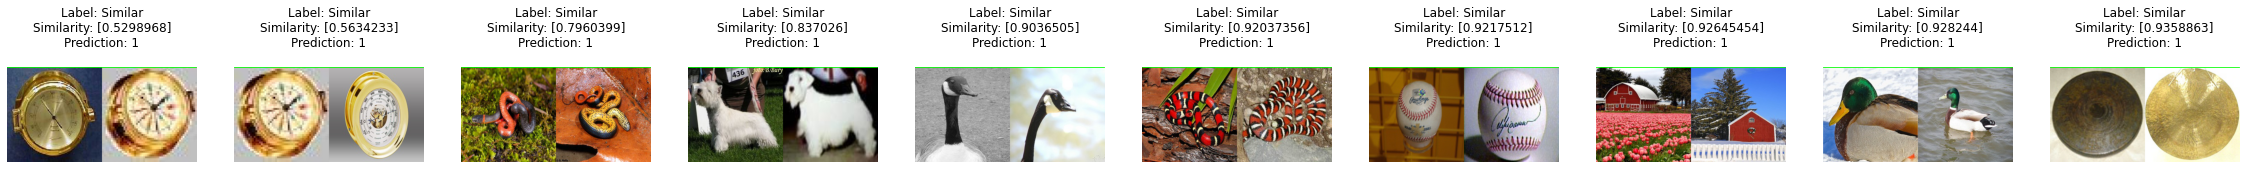

Threshold:  0.5


In [5]:
util.evaluate(data=data_test, labels=labels_test, similarity=similarity2, name="binary cross-entropy", threshold=0.5)

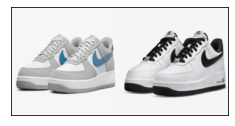

similarity:  0.59780556


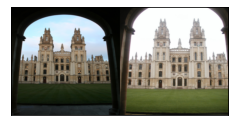

similarity:  0.3442071


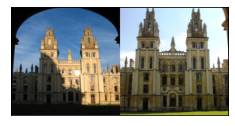

similarity:  0.40850297


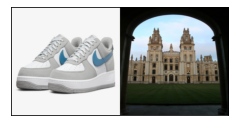

similarity:  0.09479817


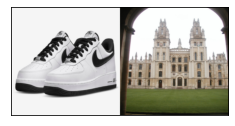

similarity:  0.09736728


In [16]:
img1 = data_test[0][0]
img2 = data_test[0][1]
img3 = data_test[1][0]
img4 = data_test[3][1]

img5 = util.load_image_norm('./1.jpg')[0]
img6 = util.load_image_norm('./3.jpg')[0]
img7 = util.load_image_norm('../../data/dataset/all_souls/all_souls_000002.jpg')[0]
img8 = util.load_image_norm('../../data/dataset/all_souls/all_souls_000006.jpg')[0]
img9 = util.load_image_norm('../../data/dataset/all_souls/all_souls_000015.jpg')[0]
img10 = util.load_image_norm('../../data/dataset/all_souls/all_souls_000026.jpg')[0]

import numpy as np

# util.visualize_images(img1, img2, img3, img4)
util.visualize_images(img5, img6)
print("similarity: ", siamese([np.expand_dims(img5, axis=0), np.expand_dims(img6, axis=0)]).numpy()[0][0])

util.visualize_images(img7, img8)
print("similarity: ", siamese([np.expand_dims(img7, axis=0), np.expand_dims(img8, axis=0)]).numpy()[0][0])

util.visualize_images(img9, img10)
print("similarity: ", siamese([np.expand_dims(img9, axis=0), np.expand_dims(img10, axis=0)]).numpy()[0][0])

util.visualize_images(img5, img7)
print("similarity: ", siamese([np.expand_dims(img5, axis=0), np.expand_dims(img7, axis=0)]).numpy()[0][0])

util.visualize_images(img6, img8)
print("similarity: ", siamese([np.expand_dims(img6, axis=0), np.expand_dims(img8, axis=0)]).numpy()[0][0])

# feature1 = embedding_extractor.predict(np.expand_dims(img1, axis=0))
# feature2 = embedding_extractor.predict(np.expand_dims(img2, axis=0))
# feature3 = embedding_extractor.predict(np.expand_dims(img3, axis=0))
# feature4 = embedding_extractor.predict(np.expand_dims(img4, axis=0))
# feature5 = embedding_extractor.predict(np.expand_dims(img5, axis=0))
# feature6 = embedding_extractor.predict(np.expand_dims(img6, axis=0))
# feature7 = embedding_extractor.predict(np.expand_dims(img7, axis=0))
# feature8 = embedding_extractor.predict(np.expand_dims(img8, axis=0))

# siamese_prediction = siamese([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)]).numpy()[0][0]
# siamese_prediction2 = siamese([np.expand_dims(img5, axis=0), np.expand_dims(img6, axis=0)]).numpy()[0][0]

# distance1 = util.cosine_similarity(feature1, feature2)
# distance2 = util.cosine_similarity(feature1, feature3)
# distance3 = util.cosine_similarity(feature1, feature4)
# distance4 = util.cosine_similarity(feature2, feature3)
# distance5 = util.cosine_similarity(feature2, feature4)
# distance6 = util.cosine_similarity(feature3, feature4)

# print(siamese_prediction2)

# print(distance1)
# print(distance2)
# print(distance3)
# print(distance4)
# print(distance5)
# print(distance6)

# print("siamese_1: ", siamese([np.expand_dims(img7, axis=0), np.expand_dims(img8, axis=0)]).numpy()[0][0])
# print("siamese_2: ", siamese([np.expand_dims(img9, axis=0), np.expand_dims(img10, axis=0)]).numpy()[0][0])
# print("siamese_3: ", siamese([np.expand_dims(img7, axis=0), np.expand_dims(img9, axis=0)]).numpy()[0][0])
# print("siamese_4: ", siamese([np.expand_dims(img8, axis=0), np.expand_dims(img10, axis=0)]).numpy()[0][0])